In [1]:
import time
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
from sklearn.utils import resample

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize=(20, 10))
    plt.title(title, fontsize=20, fontweight='bold')
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", fontsize=16)
    plt.ylabel("Score", fontsize=16)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best", fontsize=15)
    return plt

# # grid_param_2 is the one you do want to plot on the x-axis (e.g max depth)
# def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
#     # Get Test Scores Mean and std for each grid search
#     scores_mean = np.array(cv_results['mean_test_score']).reshape(len(grid_param_2),len(grid_param_1))
#     scores_sd = np.array(cv_results['std_test_score']).reshape(len(grid_param_2),len(grid_param_1))

#     # Plot Grid search scores
#     _, ax = plt.subplots(1,1, figsize=(20, 10))

#     # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
#     for idx, val in enumerate(grid_param_1):
#         ax.plot(grid_param_2, scores_mean[:,idx], '--', label= name_param_1 + ': ' + str(val))
#         ax.plot(grid_param_2, scores_mean[:,idx], '*')

        
#     ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
#     ax.set_xlabel(name_param_2, fontsize=16)
#     ax.set_ylabel('CV Average Score', fontsize=16)
#     ax.legend(loc="best", fontsize=15)
#     ax.grid('on')
    
#     # Shrink current axis's height by 10% on the bottom
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0 + box.height * 0.15,
#                      box.width, box.height * 0.85])

#     # Put a legend below current axis
#     ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#               fancybox=True, shadow=True, ncol=5)

# plots in log
def plot_grid_search(cv_results, grid_param, name_param, set_x_log=False):
    test_scores_mean = np.array(cv_results['mean_test_score'])
    train_scores_mean = np.array(cv_results['mean_train_score'])
    print(test_scores_mean)
    print(train_scores_mean)
    _, ax = plt.subplots(1, 1, figsize=(20, 10))
    ax.plot(grid_param, test_scores_mean, '--', label=  'test set')
    ax.plot(grid_param, train_scores_mean, '--', label= 'train set')
    ax.plot(grid_param, test_scores_mean, '*')
    ax.plot(grid_param, train_scores_mean, '*')
    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param, fontsize=16)
    ax.set_ylabel('Score', fontsize=16)
    ax.grid(True)
    ax.legend(loc='upper right', fontsize=15)
    if set_x_log:
        ax.set_xscale('log')
#     # Shrink current axis's height by 10% on the bottom
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0 + box.height * 0.15,
#                      box.width, box.height * 0.85])

#     # Put a legend below current axis
#     ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#               fancybox=True, shadow=True, ncol=5)
    
# max depth of trees learned in grid search
def dectree_max_depth(tree):
    n_nodes = tree.node_count
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)


In [2]:
# df = pd.read_csv('bank/bank.csv', sep=";")
# X, y = pd.get_dummies(df.loc[:, df.columns != 'y']).values, df.loc[:, df.columns == 'y'].values.flatten()
df = pd.read_csv('bank/bank.csv', sep=";")

df_majority = df[df.y == 'no']
df_minority = df[df.y == 'yes']
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=521,    # to match majority class
#                                  random_state=123) # reproducible results

# # Combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# # Display new class counts
# df_upsampled.y.value_counts()

# y = (df_upsampled.y).values.flatten()
# X = pd.get_dummies(df_upsampled.drop('y', axis=1)).values

# # ===


df_majority_downsampled = resample(df_majority,
                                  replace=False,
                                  n_samples=521,
                                  random_state=123)

df_downsampled = pd.concat([df_minority, df_majority_downsampled])
df_downsampled.y.value_counts()

# ===

y = (df_downsampled.y).values.flatten()
X = pd.get_dummies(df_downsampled.drop('y', axis=1)).values

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)


In [23]:

# Set the parameters by cross-validation
max_depths = np.concatenate((np.linspace(1, 10, 10), [20, 30]), axis=0)
tuned_parameters = [{'max_depth' : max_depths}]

estimator = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, min_samples_split=20)

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    gs = GridSearchCV(estimator, tuned_parameters, cv=5,
                       scoring=score)
    gs.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(gs.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, gs.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# tuned_parameters = [1, 5, 10, 20, 50, 100]
# for idx, parameter in enumerate(tuned_parameters):
#     tree.DecisionTreeClassifier(criterion='entropy', )


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'max_depth': 5.0}

Grid scores on development set:

0.738 (+/-0.067) for {'max_depth': 1.0}
0.757 (+/-0.049) for {'max_depth': 2.0}
0.770 (+/-0.065) for {'max_depth': 3.0}
0.787 (+/-0.054) for {'max_depth': 4.0}
0.794 (+/-0.050) for {'max_depth': 5.0}
0.782 (+/-0.052) for {'max_depth': 6.0}
0.778 (+/-0.051) for {'max_depth': 7.0}
0.775 (+/-0.053) for {'max_depth': 8.0}
0.772 (+/-0.044) for {'max_depth': 9.0}
0.755 (+/-0.067) for {'max_depth': 10.0}
0.767 (+/-0.055) for {'max_depth': 20.0}
0.767 (+/-0.055) for {'max_depth': 30.0}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

         no       0.84      0.66      0.74       131
        yes       0.72      0.87      0.79       130

avg / total       0.78      0.77      0.76       261




[0.73751601 0.75672215 0.76952625 0.78745198 0.79385403 0.78233035
 0.77848912 0.77464789 0.77208707 0.75544174 0.76696543 0.76696543]
[0.74775641 0.76472205 0.78136205 0.81081487 0.82298256 0.82874615
 0.83770769 0.84635385 0.84987385 0.85531487 0.86779949 0.86779949]


/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


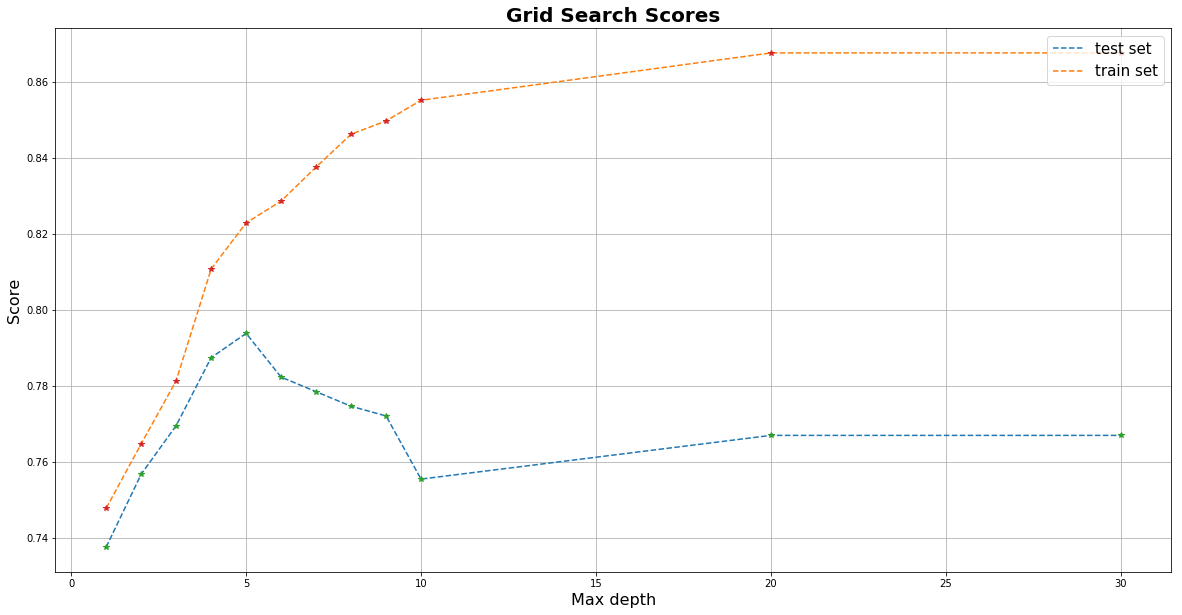

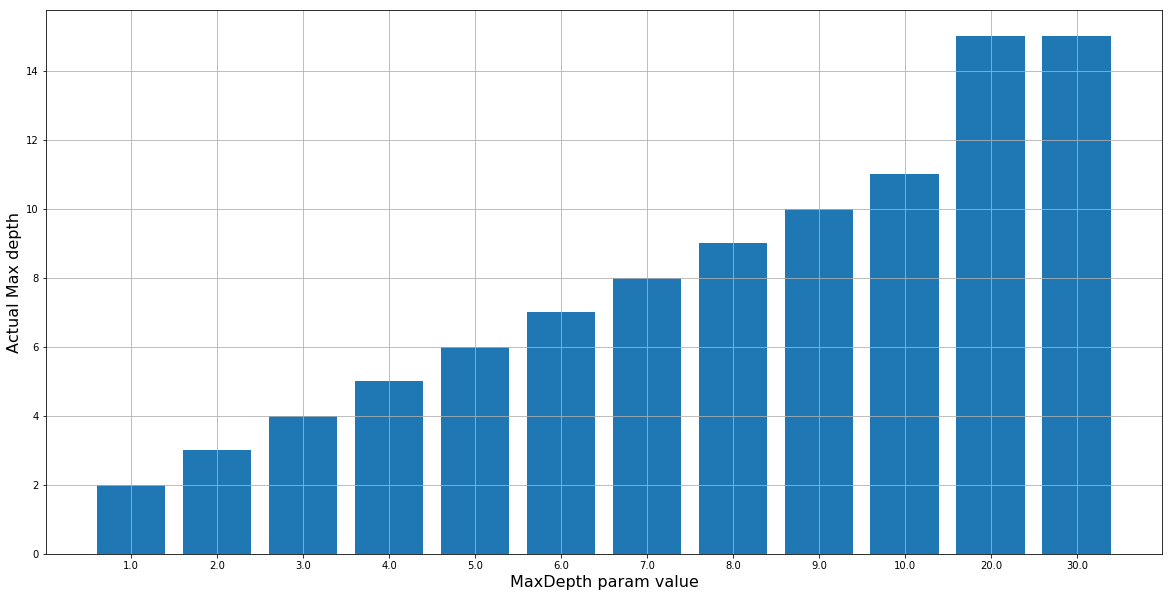

In [24]:
# my own grid search 
# Set the parameters by cross-validation

depths = []
train_scores = []
test_scores = []

for max_depth in max_depths:
    estimator = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, min_samples_split=20, max_depth=max_depth)
    estimator.fit(X_train, y_train)
    depths.append(dectree_max_depth(estimator.tree_))
    train_scores.append(estimator.score(X_train, y_train))
    test_scores.append(estimator.score(X_test, y_test))

plot_grid_search(gs.cv_results_, tuned_parameters[0]['max_depth'], 'Max depth', set_x_log=False)


plt.figure(figsize=(20, 10))
plt.bar([i for i in range(len(tuned_parameters[0]['max_depth']))], depths)
plt.ylabel('Actual Max depth', fontsize=16)
plt.xlabel('MaxDepth param value', fontsize=16)
plt.grid(True)
plt.xticks([i for i in range(len(tuned_parameters[0]['max_depth']))], tuple(max_depths))
plt.show()

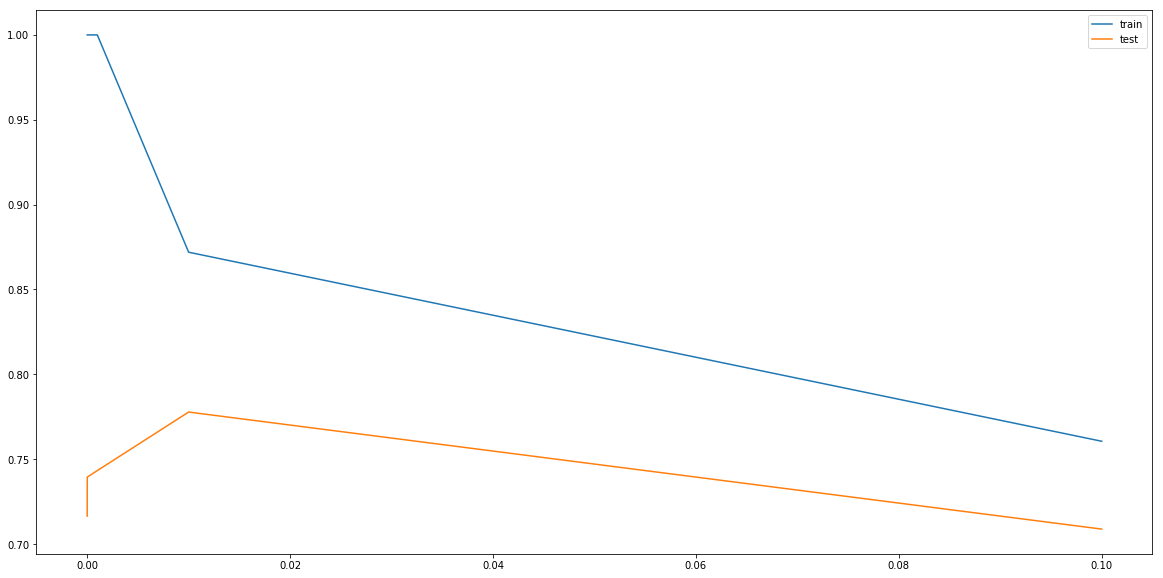

In [45]:
# # a promising tree (looks pretty)
# min_samples_leafs=[1e-8, 1e-5, 1e-3, 1e-2, 1e-1]
# train_scores = []
# test_scores = []
# for min_samples_leaf in min_samples_leafs:
#     estimator = tree.DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=30, min_impurity_decrease=1e-5, min_samples_leaf=min_samples_leaf)
#     estimator.fit(X_train, y_train)
#     train_scores.append(estimator.score(X_train, y_train))
#     test_scores.append(estimator.score(X_test, y_test))
    
# plt.figure(figsize=(20, 10))
# plt.plot(min_samples_leafs, train_scores, label='train')
# plt.plot(min_samples_leafs, test_scores, label='test')
# plt.legend(loc='best')
# plt.show()
    

/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/whe318/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


inner train size: 78, inner test size: 703
inner train size: 234, inner test size: 547
inner train size: 390, inner test size: 391
inner train size: 546, inner test size: 235
inner train size: 702, inner test size: 79


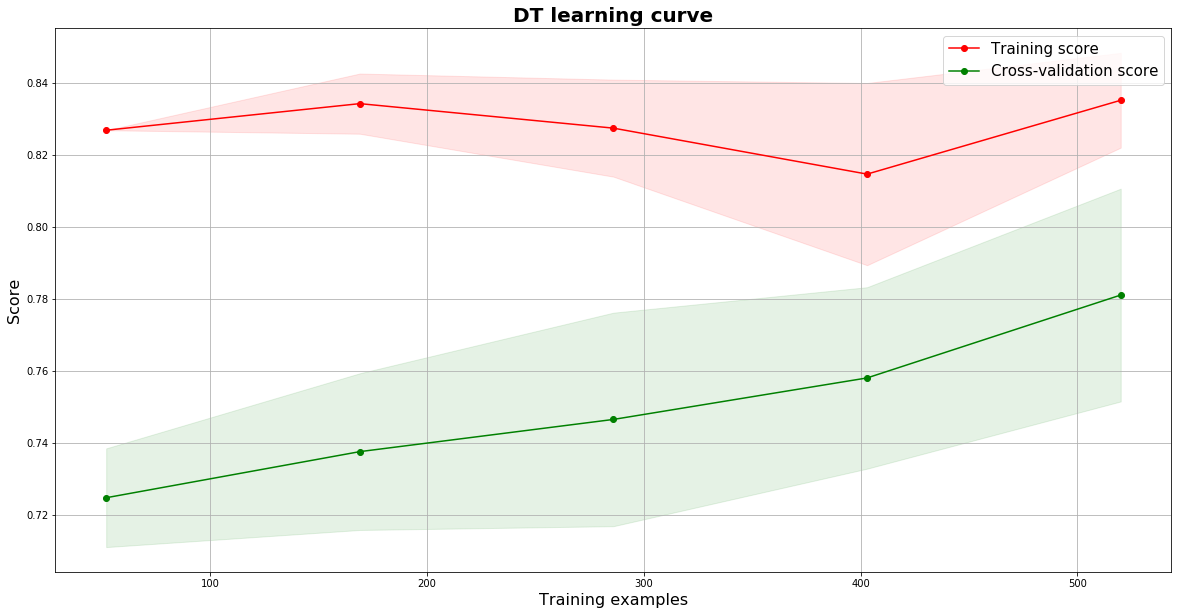

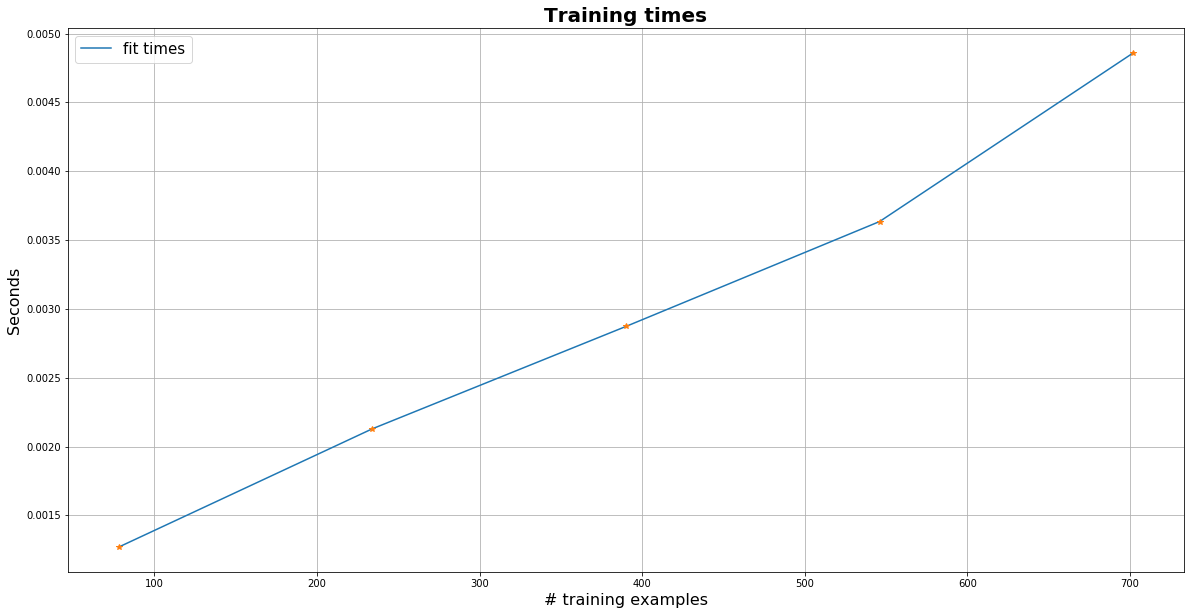

In [28]:
# pick the best decision tree and plot learning curve for it

estimator = gs.best_estimator_



title = 'DT learning curve'
plot_learning_curve(estimator, title, X_train, y_train)


X_test, y_test
train_sizes = []
train_scores=[]
test_scores=[]
fit_times=[]
for frac in np.linspace(0.1, 0.9, 5):
    inner_train_X, inner_test_X, inner_train_y, inner_test_y = train_test_split(X_train, y_train, train_size=frac, shuffle=True, stratify=y_train)
    print("inner train size: {}, inner test size: {}".format(len(inner_train_X), len(inner_test_X)))
    train_sizes.append(len(inner_train_X))
    start = time.time()
    estimator.fit(inner_train_X, inner_train_y)
    fit_times.append(time.time() - start)
    train_scores.append(estimator.score(inner_train_X, inner_train_y))
    test_scores.append(estimator.score(X_test, y_test)) # score on the original test set
    

# associate the train times with the learning curve
plt.figure(figsize=(20,10))
plt.plot(train_sizes, fit_times, label='fit times')
plt.plot(train_sizes, fit_times, '*')
plt.ylabel('Seconds', fontsize=16)
plt.xlabel('# training examples', fontsize=16)
plt.title('Training times', fontsize=20, fontweight='bold')
plt.legend(loc='best', fontsize=15)
plt.grid('on')

plt.show() 

inner train size: 78, inner test size: 703
inner train size: 234, inner test size: 547
inner train size: 390, inner test size: 391
inner train size: 546, inner test size: 235
inner train size: 702, inner test size: 79


/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


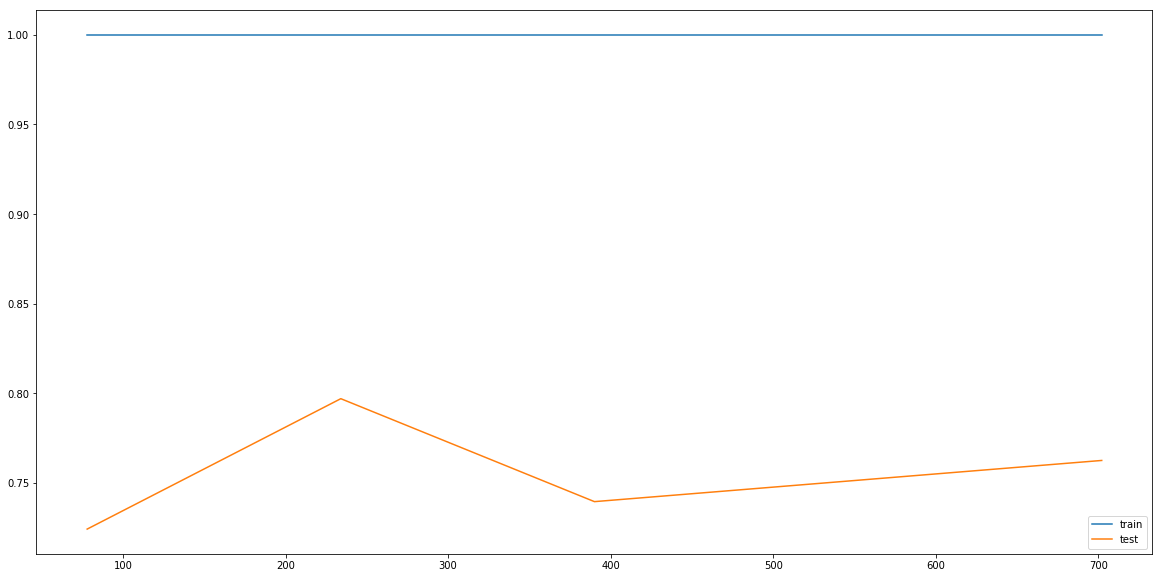

In [34]:
# pick the tree with the best max_depth and plot learning curve for it
# my own learning curve generator

X_test, y_test
train_sizes = []
train_scores=[]
test_scores=[]
for frac in np.linspace(0.1, 0.9, 5):
    inner_train_X, inner_test_X, inner_train_y, inner_test_y = train_test_split(X_train, y_train, train_size=frac, shuffle=True, stratify=y_train)
    print("inner train size: {}, inner test size: {}".format(len(inner_train_X), len(inner_test_X)))
    train_sizes.append(len(inner_train_X))
    estimator.fit(inner_train_X, inner_train_y)
    train_scores.append(estimator.score(inner_train_X, inner_train_y))
    test_scores.append(estimator.score(X_test, y_test)) # score on the original test set
    
plt.figure(figsize=(20,10))
plt.plot(train_sizes, train_scores, label='train')
plt.plot(train_sizes, test_scores, label='test')
plt.legend(loc='best')
plt.show()

In [35]:
# score the final decision tree on the test set
estimator = tree.DecisionTreeClassifier(criterion='entropy', max_depth=25)
estimator.fit(X_train, y_train)
estimator.score(X_test, y_test)

0.7854406130268199

In [42]:
# export tree to .png
tree.export_graphviz(estimator, out_file='tree1.dot', class_names=['yes', 'no'], filled=True, leaves_parallel=True)

In [34]:
np.arange(20).reshape((10, 2))

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

In [16]:
tuple(np.linspace(5, 35, 7))

'(5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0)'

-2.995732273553991